In [1]:
# Preprocessing 
# Load data 
import pandas as pd 
import numpy as np 

In [2]:
# load the dataset 
df=pd.read_csv("Health_Data_Full.csv")

In [3]:
# drop the irrelevant columns 
df =df.drop(columns=["Patient_ID", "Admission_Date","Discharge_Date"])

In [4]:
# Handle the missing values
df.isnull().sum()

Gender                         0
Age                            0
City                           0
State                          0
Department                     0
Length_of_Stay                 0
Room_Type                      0
Treatment_Type                 0
Treatment_Cost_INR             0
Insurance_Provider             0
Insurance_Coverage_Pct         0
Insurance_Payout_INR           0
Patient_Pay_INR                0
Revenue_INR                    0
Outcome                        0
Patient_Satisfaction_Rating    0
Year                           0
Age_Group                      0
dtype: int64

In [6]:
# encode categorical variables
# labelencoder for binary columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [7]:
# OneHotEncoder for multi-class categories
df = pd.get_dummies(df, columns=["Department","Insurance_Provider"], drop_first=True)

In [9]:
# Scale Numerical Features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols =["Age", "Revenue_INR","Length_of_Stay"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [11]:
# Define Features (X) and Target (y) 
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [12]:
# Train/Test Split
from sklearn.model_selection import train_test_split

In [13]:
# perform train/Test Split 
x_train,x_test,y_train,y_test = train_test_split( x,y,test_size=0.2, random_state=42,
    stratify=y)


In [15]:
# Verify the Split 
print("Training set:",x_train.shape, y_train.shape)
print("Testing set:",x_test.shape, y_train.shape)

Training set: (7959, 31) (7959,)
Testing set: (1990, 31) (7959,)


In [16]:
# Model building 
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

In [20]:
# Build Random Forest Classifier 
# Intialize the model with key parameters
rf_model = RandomForestClassifier(
   n_estimators=100,
   max_depth=None,
   random_state=42
)

In [35]:
# Train the model
rf_model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Hyderabad'

In [23]:
rf_model.fit(x_train, y_train)


ValueError: could not convert string to float: 'Hyderabad'

In [34]:
df.dtypes


Gender                         int32
Age                          float64
Length_of_Stay               float64
Treatment_Cost_INR             int64
Insurance_Coverage_Pct       float64
                              ...   
Treatment_Type_Medication       bool
Treatment_Type_Surgery          bool
Treatment_Type_Therapy          bool
Age_Group_Child                 bool
Age_Group_Senior                bool
Length: 66, dtype: object

KeyError: "['Department', 'Insurance_Provider'] not in index"

In [26]:
# Encoding Remaining Object columns 
# encode Target(Outcome) 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Outcome"] = le.fit_transform(df["Outcome"])

In [27]:
# One-Hot Encoder Multi_Class Features 
df =pd.get_dummies(df, columns=["City","State","Room_Type",
                                "Treatment_Type","Age_Group"],
           drop_first=True)        

In [28]:
# Define Features and Target
x=df.drop("Outcome", axis=1)
y=df["Outcome"]

In [33]:
df.dtypes

Gender                         int32
Age                          float64
Length_of_Stay               float64
Treatment_Cost_INR             int64
Insurance_Coverage_Pct       float64
                              ...   
Treatment_Type_Medication       bool
Treatment_Type_Surgery          bool
Treatment_Type_Therapy          bool
Age_Group_Child                 bool
Age_Group_Senior                bool
Length: 66, dtype: object

In [36]:
rf_model.fit(x_train, y_train)


ValueError: could not convert string to float: 'Hyderabad'

In [37]:
df.dtypes


Gender                         int32
Age                          float64
Length_of_Stay               float64
Treatment_Cost_INR             int64
Insurance_Coverage_Pct       float64
                              ...   
Treatment_Type_Medication       bool
Treatment_Type_Surgery          bool
Treatment_Type_Therapy          bool
Age_Group_Child                 bool
Age_Group_Senior                bool
Length: 66, dtype: object

In [41]:
df.dtypes


Gender                         int32
Age                          float64
Length_of_Stay               float64
Treatment_Cost_INR             int64
Insurance_Coverage_Pct       float64
                              ...   
Treatment_Type_Medication       bool
Treatment_Type_Surgery          bool
Treatment_Type_Therapy          bool
Age_Group_Child                 bool
Age_Group_Senior                bool
Length: 66, dtype: object

In [42]:
import pandas as pd

pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.max_rows', None)      # show all rows if needed

print(df.dtypes)


Gender                                  int32
Age                                   float64
Length_of_Stay                        float64
Treatment_Cost_INR                      int64
Insurance_Coverage_Pct                float64
Insurance_Payout_INR                    int64
Patient_Pay_INR                         int64
Revenue_INR                           float64
Outcome                                 int64
Patient_Satisfaction_Rating             int64
Year                                    int64
Department_ENT                           bool
Department_Emergency                     bool
Department_Gastroenterology              bool
Department_General Medicine              bool
Department_Nephrology                    bool
Department_Neurology                     bool
Department_Obstetrics & Gynecology       bool
Department_Oncology                      bool
Department_Orthopedics                   bool
Department_Pediatrics                    bool
Department_Pulmonology            

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (7959, 65) (7959,)
Testing set: (1990, 65) (1990,)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [45]:
# Intialize Models 
# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42
)


In [46]:
# Logistic Regression
log_model = LogisticRegression(
    solver='liblinear',    # good for small/medium datasets
    random_state=42
)


In [47]:
# Train Models 
rf_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [48]:
# Make Predictions 
y_pred_rf=rf_model.predict(x_test)
y_pred_log=log_model.predict(x_test)

In [49]:
# Model Evaluation 
# Import Metrics 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [50]:
# Evaluate Random Forest
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print("Precision:", precision_score(y_test,y_pred_rf, average='weighted'))
print("Recall:",recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test,y_pred_rf, average='weighted'))
print("\n Classification Report:\n",classification_report(y_test,y_pred_rf))

Random Forest Evaluation:
Accuracy: 0.24371859296482412
Precision: 0.24385744073843124
Recall: 0.24371859296482412
F1 Score: 0.2437165096691458

 Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.24      0.24       502
           1       0.25      0.26      0.26       491
           2       0.26      0.25      0.25       507
           3       0.23      0.23      0.23       490

    accuracy                           0.24      1990
   macro avg       0.24      0.24      0.24      1990
weighted avg       0.24      0.24      0.24      1990



In [51]:
# Ealuate Logistic Regression 
print("Logistic Regression Evaluation:")
print("Accuracy:",accuracy_score(y_test,y_pred_log))
print("Precision:", precision_score(y_test,y_pred_log, average='weighted'))
print("Recall:",recall_score(y_test,y_pred_log, average='weighted'))
print("F1 Score:", f1_score(y_test,y_pred_log, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test,y_pred_log))

Logistic Regression Evaluation:
Accuracy: 0.25025125628140704
Precision: 0.24796009824283272
Recall: 0.25025125628140704
F1 Score: 0.2458950639198902

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.26      0.28       502
           1       0.25      0.23      0.24       491
           2       0.26      0.36      0.30       507
           3       0.19      0.15      0.17       490

    accuracy                           0.25      1990
   macro avg       0.25      0.25      0.25      1990
weighted avg       0.25      0.25      0.25      1990



In [52]:
# step by step : Confusion Matrix 
# import libraries 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

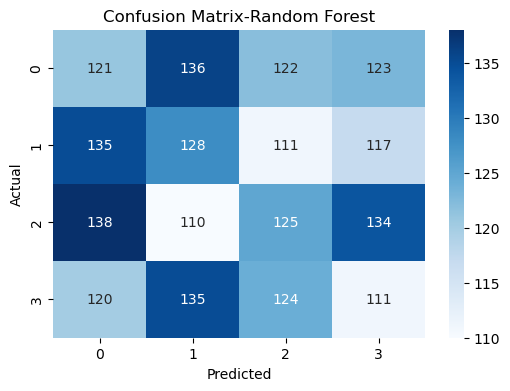

In [54]:
# Create Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d',cmap='Blues',xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix-Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
# Confusion Matrix for Logistic Regression
# import Libraries 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 


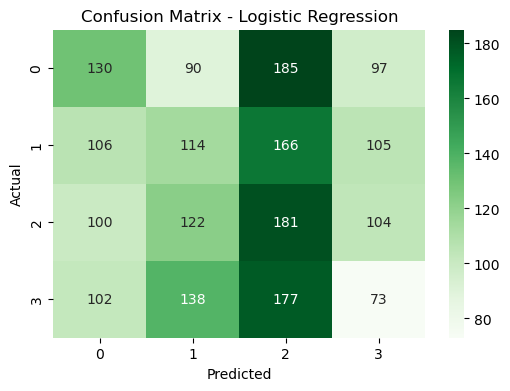

In [56]:
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
# Extract Feature Importances
import pandas as pd

# Get feature importance values 
importances = rf_model.feature_importances_

# Match them with column names 
feature_importance_df = pd.DataFrame({
    'Feature':X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


C:\Users\srava\AppData\Local\Temp\ipykernel_27136\1388111004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',data=feature_importance_df.head(15), palette='viridis')


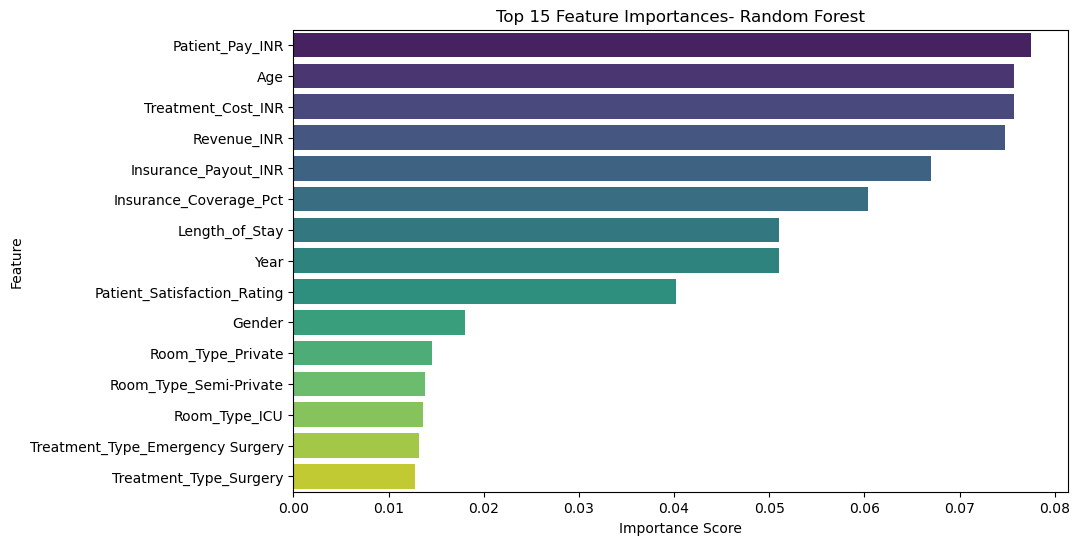

In [62]:
# Visualize with Bar Chart 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature',data=feature_importance_df.head(15), palette='viridis')
plt.title("Top 15 Feature Importances- Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [63]:
# Integrate ML Results into Dashboards 
# Export Predictions & Metrics 
results_df = pd.DataFrame({
    "Actual": y_test,
    "RF_Predicted": y_pred_rf,
    "Log_Predicted": y_pred_log
})
results_df.to_csv("ML_Predictions.csv", index=False)

In [65]:
# Export the Metrics Seperately
metrics_df = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf),accuracy_score(y_test,y_pred_log)],
    "Precision": [precision_score(y_test, y_pred_rf, average='weighted'),
                  precision_score(y_test, y_pred_log, average='weighted')],
    "Recall": [recall_score(y_test,y_pred_rf, average='weighted'),
               recall_score(y_test, y_pred_log, average='weighted')],
    "F1_Score": [f1_score(y_test, y_pred_rf, average='weighted'),
                 f1_score(y_test, y_pred_log, average='weighted')]
})
metrics_df.to_csv("ML_Metrics.csv",index=False)

In [66]:
# Export Feature Importance into csv 
feature_importance_df.to_csv("Feature_Importance.csv",index=False)
